In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Customers.csv")
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
df.shape

(2000, 8)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [7]:
#renaming a column name
df.rename(columns = {'Spending Score (1-100)':'SpendingScore'}, inplace = True)
df.rename(columns = {'Annual Income ($)':'AnnualIncome'}, inplace = True)
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

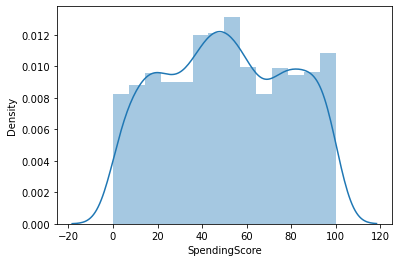

In [8]:
sns.distplot(df.SpendingScore)

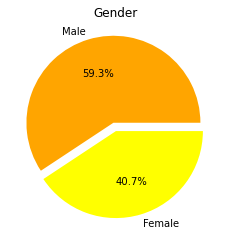

In [9]:
plt.pie(df.Gender.value_counts(),[0.1,0],labels=["Male","Female"],autopct="%1.1f%%",colors=["orange","yellow"])
plt.title("Gender")
plt.show()

<AxesSubplot:xlabel='Profession', ylabel='count'>

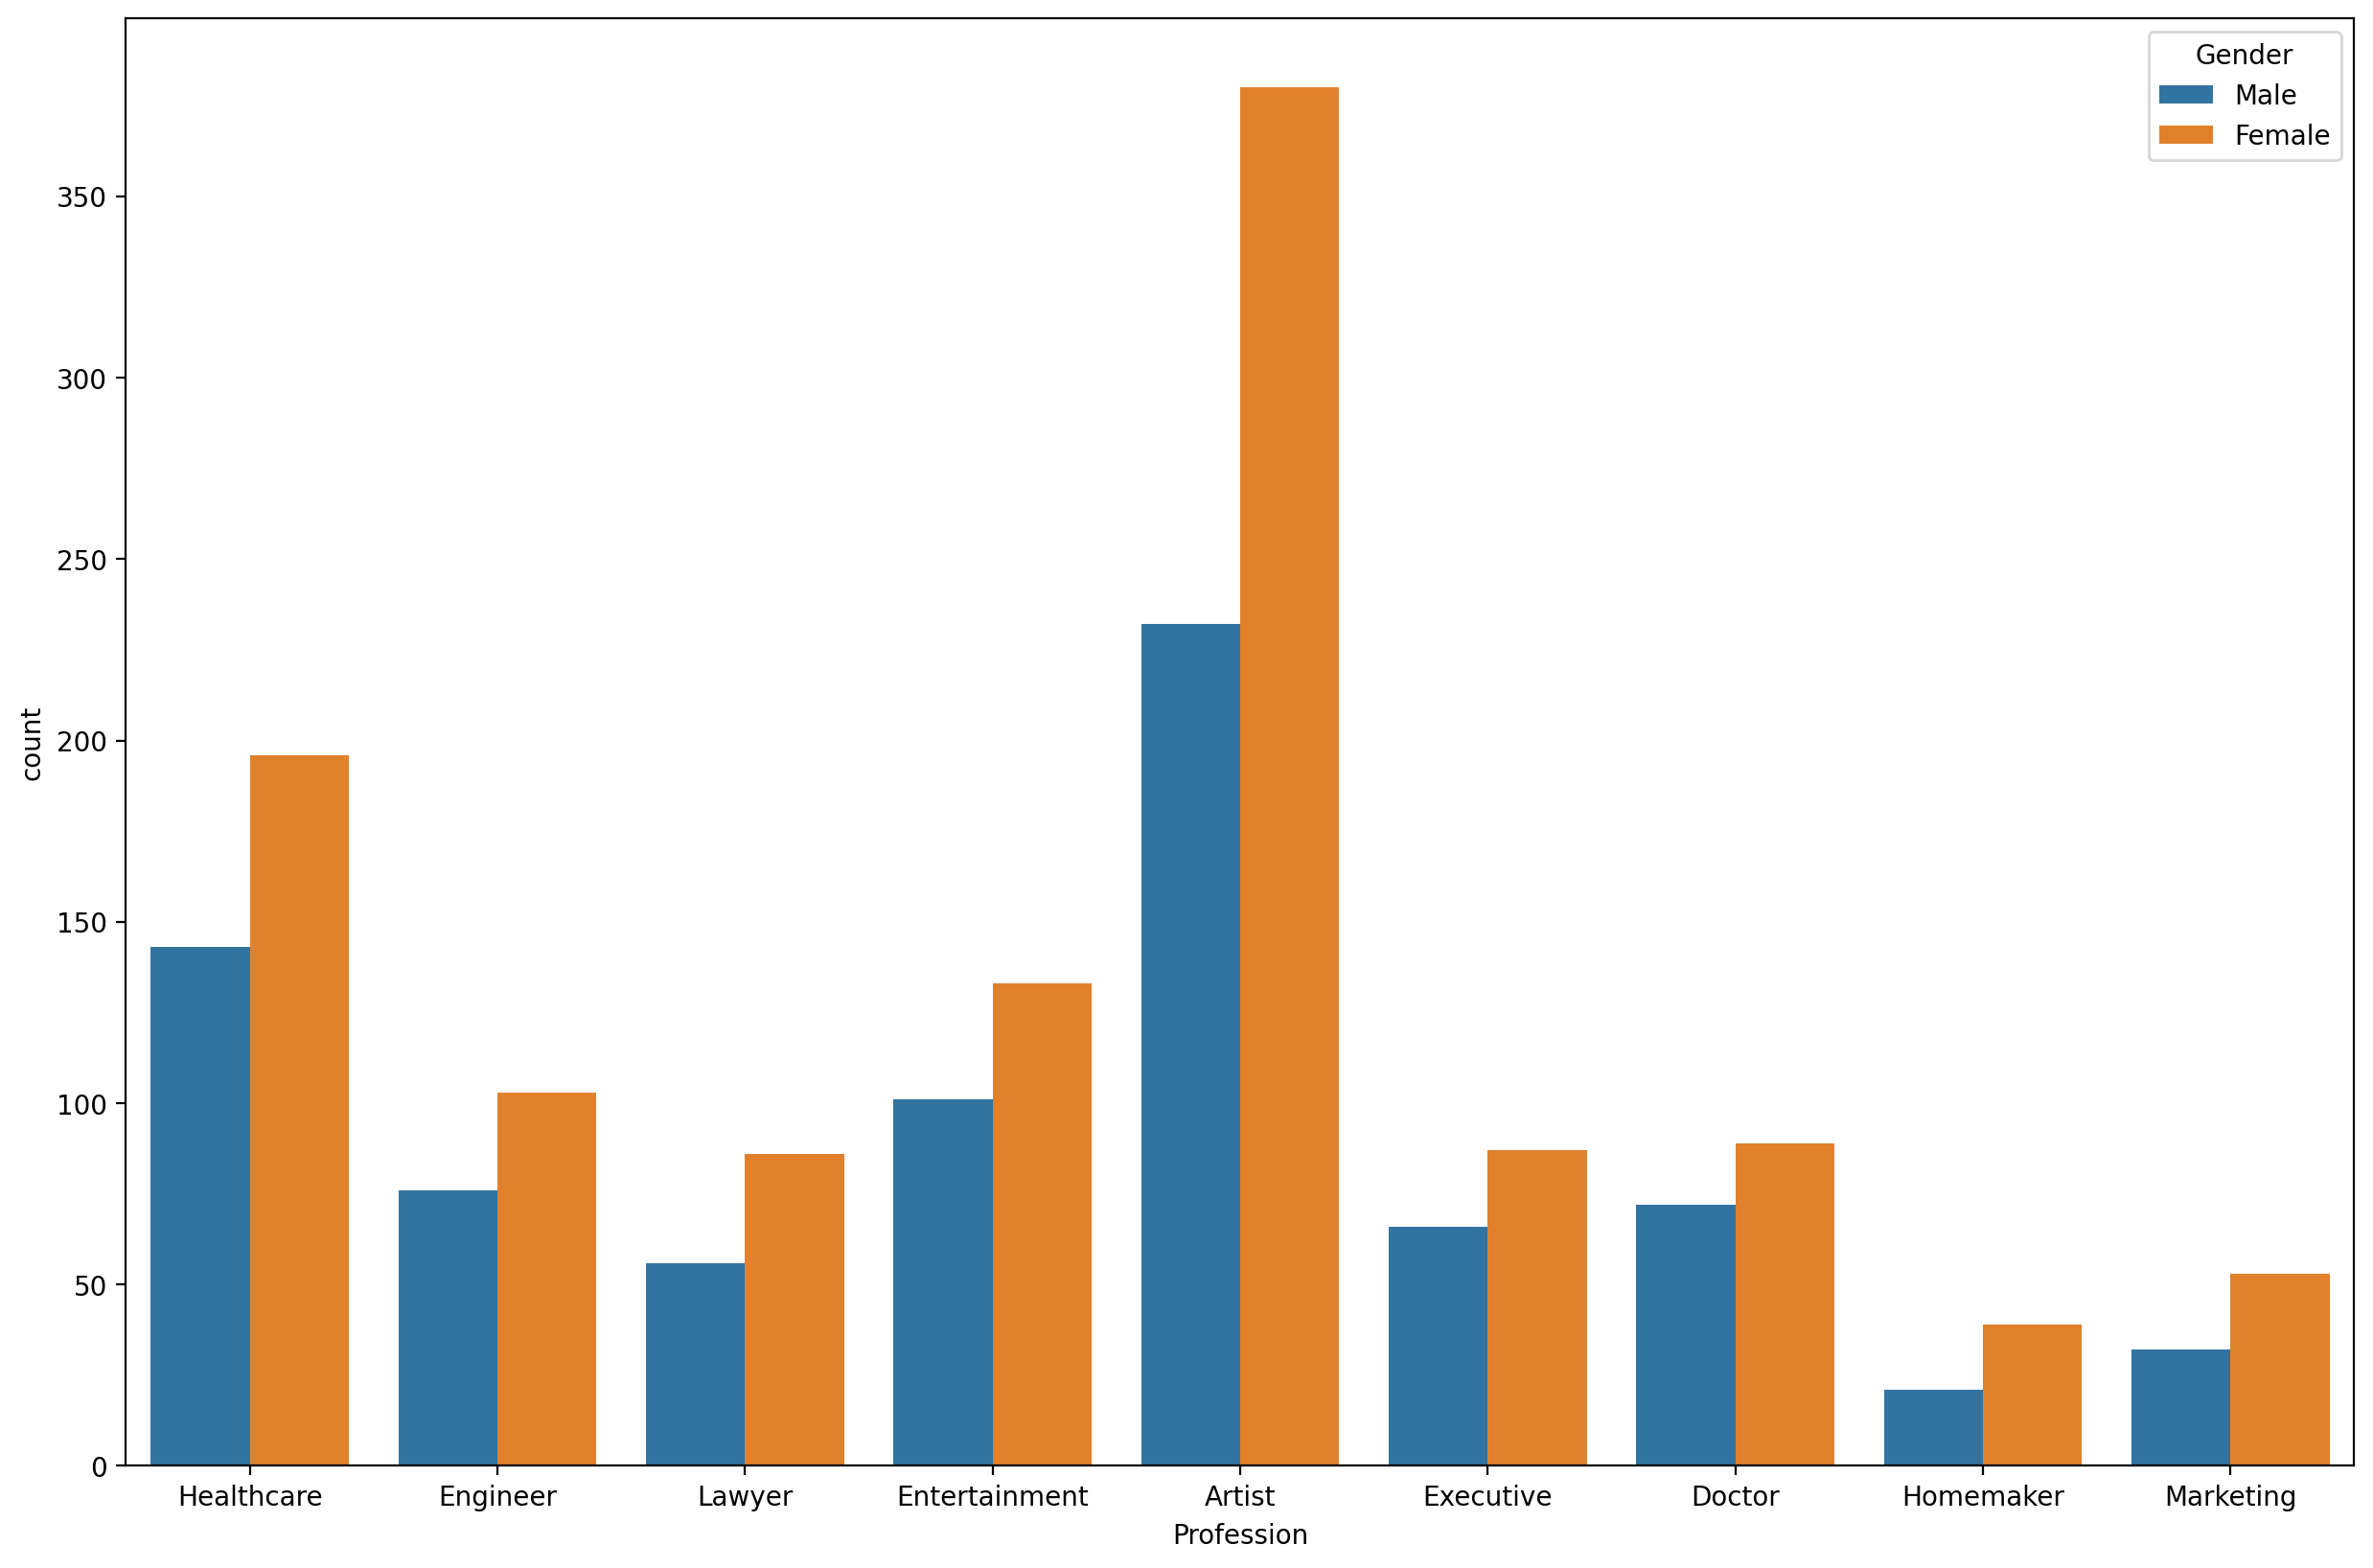

In [10]:
# Number of Male and Female Professions based on the field
plt.figure(figsize=(15,10),dpi=200)
sns.countplot(data = df,x="Profession",hue="Gender")

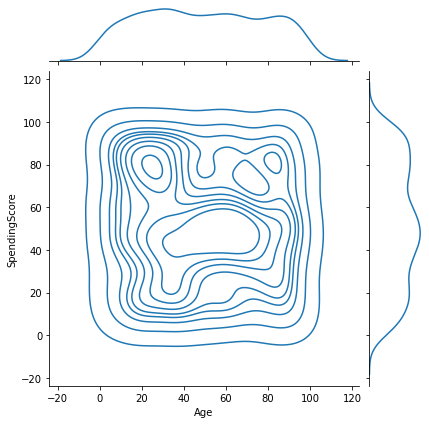

In [11]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="SpendingScore", data=df, kind="kde");
plt.show()

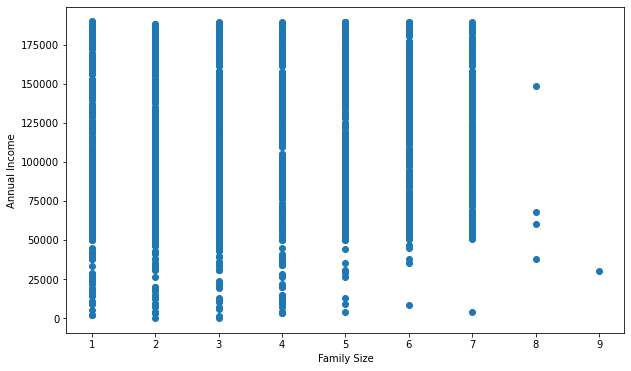

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Family Size'], df['AnnualIncome'])
ax.set_xlabel('Family Size')
ax.set_ylabel('Annual Income')
plt.show()

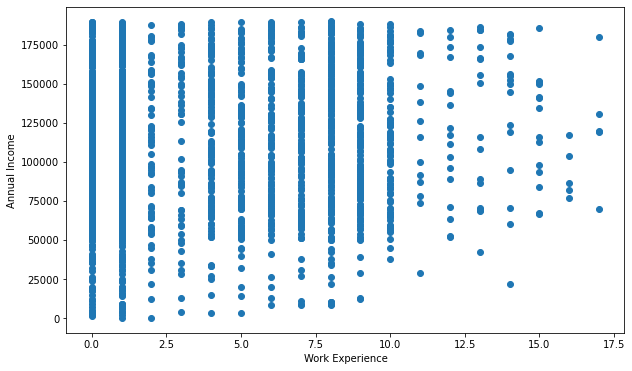

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Work Experience'], df['AnnualIncome'])
ax.set_xlabel('Work Experience')
ax.set_ylabel('Annual Income')
plt.show()

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'SpendingScore'}>],
       [<AxesSubplot:title={'center':'Work Experience'}>,
        <AxesSubplot:title={'center':'Family Size'}>]], dtype=object)

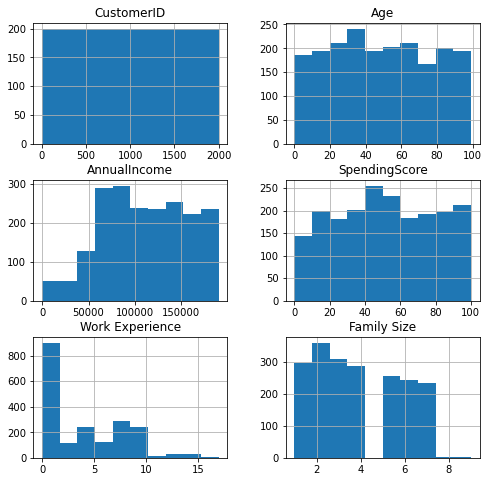

In [14]:
df.hist(figsize=(8,8))

<AxesSubplot:>

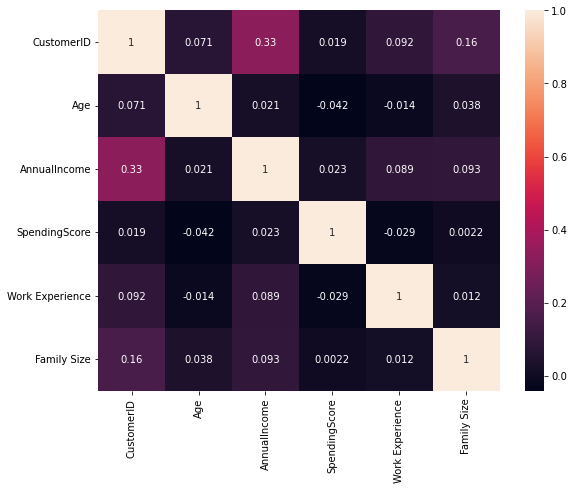

In [15]:
plt.figure(figsize=[9,7])
sns.heatmap(df.corr(),annot=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   AnnualIncome     2000 non-null   int64 
 4   SpendingScore    2000 non-null   int64 
 5   Profession       1965 non-null   object
 6   Work Experience  2000 non-null   int64 
 7   Family Size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [17]:
#Checking for null values
df.isnull().any()

CustomerID         False
Gender             False
Age                False
AnnualIncome       False
SpendingScore      False
Profession          True
Work Experience    False
Family Size        False
dtype: bool

In [18]:
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
AnnualIncome        0
SpendingScore       0
Profession         35
Work Experience     0
Family Size         0
dtype: int64

In [19]:
df=df.fillna(df.mode())

In [20]:
df.head(20)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [21]:
#Checking for Categorical Columns
df.select_dtypes(include=['object']).columns.tolist()

['Gender', 'Profession']

In [22]:
df=pd.get_dummies(df,columns=['Gender'])
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size,Gender_Female,Gender_Male
0,1,19,15000,39,Healthcare,1,4,0,1
1,2,21,35000,81,Engineer,3,3,0,1
2,3,20,86000,6,Engineer,1,1,1,0
3,4,23,59000,77,Lawyer,0,2,1,0
4,5,31,38000,40,Entertainment,2,6,1,0


In [23]:
le=LabelEncoder()
df.Profession=le.fit_transform(df.Profession)
df

,CustomerID,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size,Gender_Female,Gender_Male
0,1,19,15000,39,5,1,4,0,1
1,2,21,35000,81,2,3,3,0,1
2,3,20,86000,6,2,1,1,1,0
3,4,23,59000,77,7,0,2,1,0
4,5,31,38000,40,3,2,6,1,0
...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,0,8,7,1,0
1996,1997,91,73158,32,1,7,7,1,0
1997,1998,87,90961,14,5,9,2,0,1
1998,1999,77,182109,4,4,7,2,0,1


In [24]:
#Dropping the CustomerID column
Up_data=df.drop(columns='CustomerID',axis=1)
Up_data.head()

,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size,Gender_Female,Gender_Male
0,19,15000,39,5,1,4,0,1
1,21,35000,81,2,3,3,0,1
2,20,86000,6,2,1,1,1,0
3,23,59000,77,7,0,2,1,0
4,31,38000,40,3,2,6,1,0


In [25]:
#Min-Max Scaling
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(Up_data)
X_scaled

array([[0.19191919, 0.07895817, 0.39      , ..., 0.375     , 0.        ,
        1.        ],
       [0.21212121, 0.18423574, 0.81      , ..., 0.25      , 0.        ,
        1.        ],
       [0.2020202 , 0.45269353, 0.06      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.87878788, 0.47880763, 0.14      , ..., 0.125     , 0.        ,
        1.        ],
       [0.77777778, 0.9585996 , 0.04      , ..., 0.125     , 0.        ,
        1.        ],
       [0.90909091, 0.58223757, 0.52      , ..., 0.125     , 0.        ,
        1.        ]])

In [26]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)
km_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [27]:
Cluster_kms =km_model.predict(X_scaled)
Cluster_kms

array([1, 1, 0, ..., 1, 1, 1])

In [28]:
#Creating a copy of the dataframe
new_df = df
#Adding the cluster data with dataframe
new_df['kcluster'] = pd.Series(Cluster_kms)
new_df

,CustomerID,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size,Gender_Female,Gender_Male,kcluster
0,1,19,15000,39,5,1,4,0,1,1
1,2,21,35000,81,2,3,3,0,1,1
2,3,20,86000,6,2,1,1,1,0,0
3,4,23,59000,77,7,0,2,1,0,2
4,5,31,38000,40,3,2,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,0,8,7,1,0,0
1996,1997,91,73158,32,1,7,7,1,0,0
1997,1998,87,90961,14,5,9,2,0,1,1
1998,1999,77,182109,4,4,7,2,0,1,1


In [29]:
#Independent variable
X=new_df.iloc[:,:-1]
X

,CustomerID,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size,Gender_Female,Gender_Male
0,1,19,15000,39,5,1,4,0,1
1,2,21,35000,81,2,3,3,0,1
2,3,20,86000,6,2,1,1,1,0
3,4,23,59000,77,7,0,2,1,0
4,5,31,38000,40,3,2,6,1,0
...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,0,8,7,1,0
1996,1997,91,73158,32,1,7,7,1,0
1997,1998,87,90961,14,5,9,2,0,1
1998,1999,77,182109,4,4,7,2,0,1


In [30]:
#dedpendent variable
y=new_df.kcluster
y

0       1
1       1
2       0
3       2
4       0
       ..
1995    0
1996    0
1997    1
1998    1
1999    1
Name: kcluster, Length: 2000, dtype: int32

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#0.3 indicates 30% test dataset and remaining 70% training dataset which is ideal size of dataset for ml algorithms training and testing 

In [32]:
X_train

,CustomerID,Age,AnnualIncome,SpendingScore,Profession,Work Experience,Family Size,Gender_Female,Gender_Male
1719,1720,48,74308,23,3,1,2,1,0
1702,1703,69,85401,10,3,4,6,1,0
1287,1288,54,179546,4,6,8,4,1,0
482,483,76,155622,81,5,0,2,0,1
768,769,25,106569,84,2,1,3,1,0
...,...,...,...,...,...,...,...,...,...
835,836,51,117620,60,5,7,6,1,0
1216,1217,78,59784,81,0,3,3,1,0
1653,1654,52,133214,1,8,9,7,1,0
559,560,0,151298,89,0,0,6,0,1


In [33]:
def classify(model):
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_test, y_test))

In [34]:
model = GaussianNB()  
classify(model)

Accuracy: 0.805


In [35]:
model = RandomForestClassifier()
classify(model)

Accuracy: 0.9883333333333333
